## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [5]:
x = np.linspace(0,20,20)
x

array([ 0.        ,  1.05263158,  2.10526316,  3.15789474,  4.21052632,
        5.26315789,  6.31578947,  7.36842105,  8.42105263,  9.47368421,
       10.52631579, 11.57894737, 12.63157895, 13.68421053, 14.73684211,
       15.78947368, 16.84210526, 17.89473684, 18.94736842, 20.        ])

In [110]:
y = -1*x +2
y

array([  2.        ,   0.94736842,  -0.10526316,  -1.15789474,
        -2.21052632,  -3.26315789,  -4.31578947,  -5.36842105,
        -6.42105263,  -7.47368421,  -8.52631579,  -9.57894737,
       -10.63157895, -11.68421053, -12.73684211, -13.78947368,
       -14.84210526, -15.89473684, -16.94736842, -18.        ])

#### Plot your data points. 

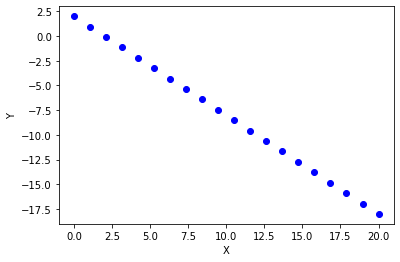

In [111]:
plt.scatter(x,y,color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [112]:
def adagrad(x,y,alph,epsi,max_iter):
    theta_0 = 0
    theta_1 = 0
    alpha = alph
    epsilon=epsi
    vt_0=0
    vt_1=0
    
    y_predict = theta_0 + theta_1 * x
    m=len(x)
    cost_func=(1/(2*m))*sum((y_predict-y)**2)
    
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    
    for i in range(max_iter):
        y_predict = theta_0 + theta_1 * x
        y_predict_list.append(y_predict)
        
        theta0_grd = (1/m) * np.sum(y_predict - y)
        theta1_grd = (1/m) * np.sum((y_predict - y) * x)
        
        vt_0=vt_0+theta0_grd**2
        vt_1=vt_1+theta1_grd**2
        
        theta_0 = theta_0 - (alpha/(np.sqrt(vt_0)+epsilon)) * theta0_grd
        theta0_list.append(theta_0)
        
        theta_1 = theta_1 - (alpha/(np.sqrt(vt_1)+epsilon)) * theta1_grd
        theta1_list.append(theta_1)
        
        cost_func=(1/(2*m))*sum((y_predict-y)**2)
        loss_list.append(cost_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict

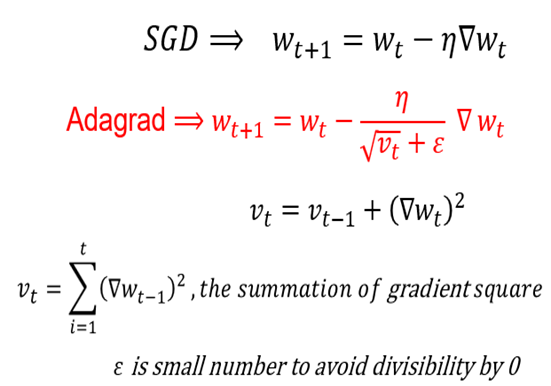

# alpha = 0.2

In [113]:
#alpha = 0.2
theta0_list,theta1_list,cost_list,y_pre_list,t0,t1,y_pre=adagrad(x,y,0.2,1e-8,1000)

In [114]:
y_predict = t0 + t1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_pre)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9999520332972701


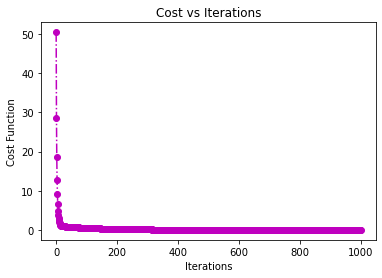

In [115]:
plt.plot(cost_list,'o-.m')
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost vs Iterations")
plt.show()

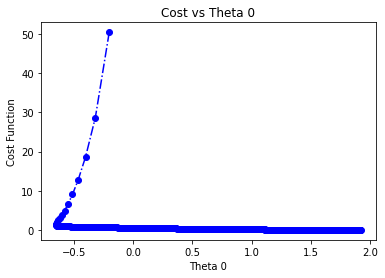

In [116]:
plt.plot(theta0_list,cost_list,'o-.b')
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost vs Theta 0")
plt.show()

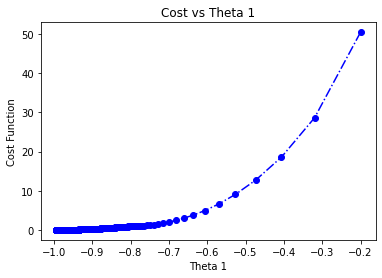

In [117]:
plt.plot(theta1_list,cost_list,'o-.b')
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost vs Theta 1")
plt.show()

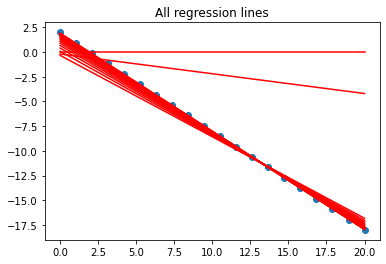

In [118]:
plt.scatter(x,y)
plt.plot(x,y_pre_list[0],color='red')
for i in range(1,len(y_pre_list),50):
    plt.plot(x,y_pre_list[i],color='red')
plt.title("All regression lines")
plt.show()

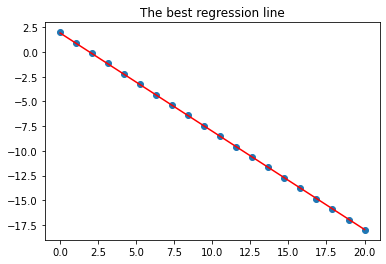

In [119]:
plt.scatter(x, y)
plt.plot(x, y_pre, color='r')
plt.title("The best regression line")
plt.show()

# alpha = 0.001

In [120]:
#alpha = 0.001
theta0_list,theta1_list,cost_list,y_pre_list,t0,t1,y_pre=adagrad(x,y,0.001,1e-8,1000)

In [121]:
y_predict = t0 + t1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_pre)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}") # so bad with low alpha

R2: -1.3402328139986555


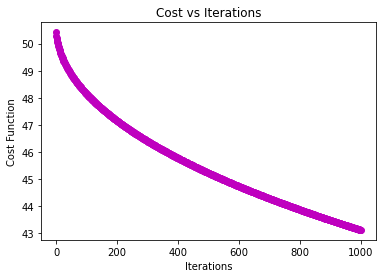

In [122]:
plt.plot(cost_list,'o-.m')
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost vs Iterations")
plt.show()

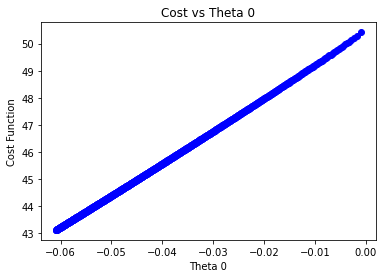

In [123]:
plt.plot(theta0_list,cost_list,'o-.b')
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost vs Theta 0")
plt.show()

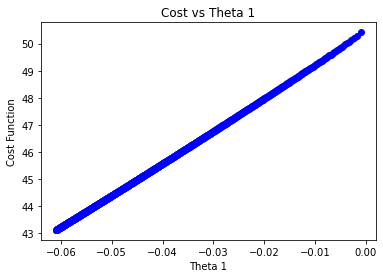

In [124]:
plt.plot(theta1_list,cost_list,'o-.b')
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost vs Theta 1")
plt.show()

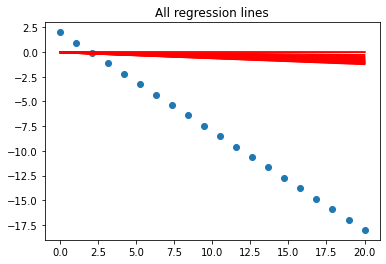

In [125]:
plt.scatter(x,y)
plt.plot(x,y_pre_list[0],color='red')
for i in range(1,len(y_pre_list),50):
    plt.plot(x,y_pre_list[i],color='red')
plt.title("All regression lines")
plt.show()

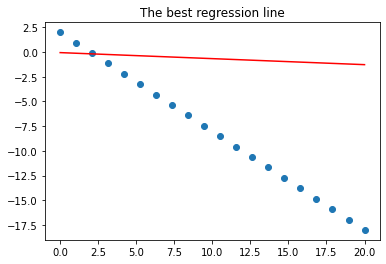

In [126]:
plt.scatter(x, y)
plt.plot(x, y_pre, color='r')
plt.title("The best regression line")
plt.show() 

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

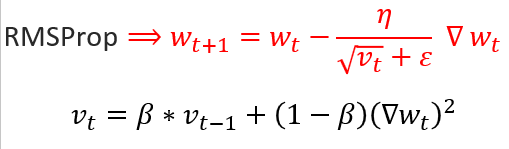

In [127]:
def rmsprop(x,y,alph,epsi,b,max_iter):
    theta_0 = 0
    theta_1 = 0
    alpha = alph
    epsilon=epsi
    beta=b
    vt_0=0
    vt_1=0
    
    y_predict = theta_0 + theta_1 * x
    m=len(x)
    cost_func=(1/(2*m))*sum((y_predict-y)**2)
    
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    
    for i in range(max_iter):
        y_predict = theta_0 + theta_1 * x
        y_predict_list.append(y_predict)
        
        theta0_grd = (1/m) * np.sum(y_predict - y)
        theta1_grd = (1/m) * np.sum((y_predict - y) * x)
        
        vt_0=beta*vt_0+(1-beta)*theta0_grd**2
        vt_1=beta*vt_1+(1-beta)*theta1_grd**2
        
        theta_0 = theta_0 - (alpha/(np.sqrt(vt_0)+epsilon)) * theta0_grd
        theta0_list.append(theta_0)
        
        theta_1 = theta_1 - (alpha/(np.sqrt(vt_1)+epsilon)) * theta1_grd
        theta1_list.append(theta_1)
        
        cost_func=(1/(2*m))*sum((y_predict-y)**2)
        loss_list.append(cost_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict

# alpha = 0.2 & b = 0.9 with Iterations = 100

In [128]:
theta0_list,theta1_list,cost_list,y_pre_list,t0,t1,y_pre=rmsprop(x,y,0.2,1e-8,0.9,100)

In [129]:
y_predict = t0 + t1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_pre)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9695098409100635


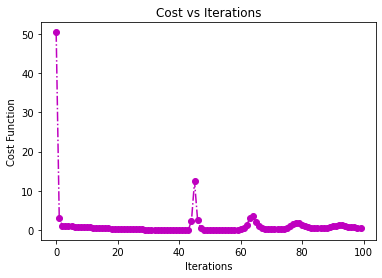

In [130]:
plt.plot(cost_list,'o-.m')
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost vs Iterations")
plt.show()

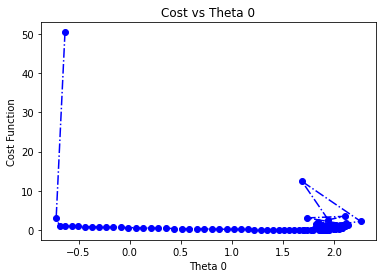

In [131]:
plt.plot(theta0_list,cost_list,'o-.b')
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost vs Theta 0")
plt.show()

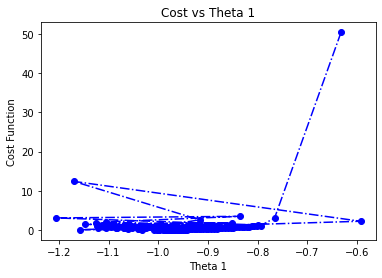

In [132]:
plt.plot(theta1_list,cost_list,'o-.b')
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost vs Theta 1")
plt.show()

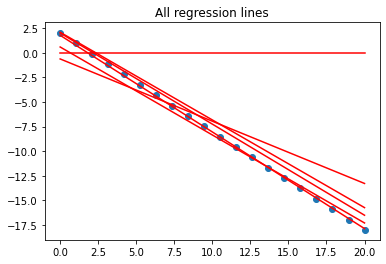

In [133]:
plt.scatter(x,y)
plt.plot(x,y_pre_list[0],color='red')
for i in range(1,len(y_pre_list),20):
    plt.plot(x,y_pre_list[i],color='red')
plt.title("All regression lines")
plt.show()

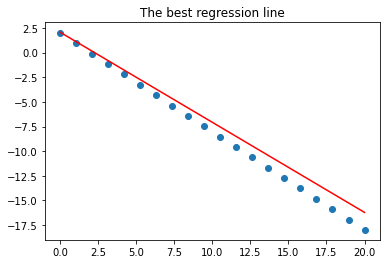

In [134]:
plt.scatter(x, y)
plt.plot(x, y_pre, color='r')
plt.title("The best regression line")
plt.show()

# alpha = 0.01 & b = 0.9 with Iterations = 1000

In [135]:
theta0_list,theta1_list,cost_list,y_pre_list,t0,t1,y_pre=rmsprop(x,y,0.01,1e-8,0.9,1000)

In [136]:
y_predict = t0 + t1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_pre)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9998928928625714


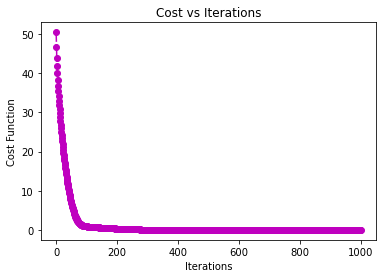

In [137]:
plt.plot(cost_list,'o-.m')
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost vs Iterations")
plt.show()

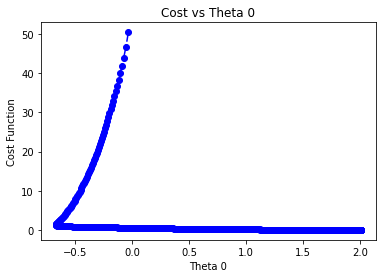

In [138]:
plt.plot(theta0_list,cost_list,'o-.b')
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost vs Theta 0")
plt.show()

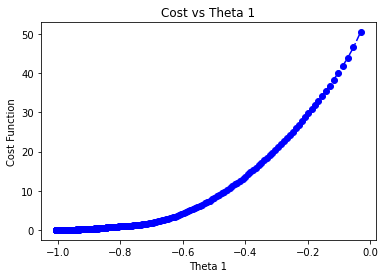

In [139]:
plt.plot(theta1_list,cost_list,'o-.b')
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost vs Theta 1")
plt.show()

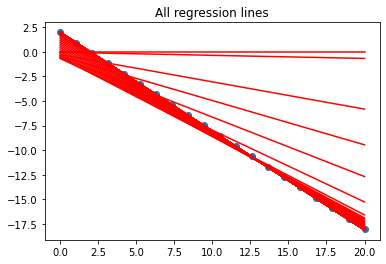

In [140]:
plt.scatter(x,y)
plt.plot(x,y_pre_list[0],color='red')
for i in range(1,len(y_pre_list),20):
    plt.plot(x,y_pre_list[i],color='red')
plt.title("All regression lines")
plt.show()

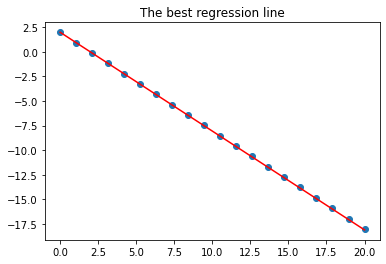

In [141]:
plt.scatter(x, y)
plt.plot(x, y_pre, color='r')
plt.title("The best regression line")
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

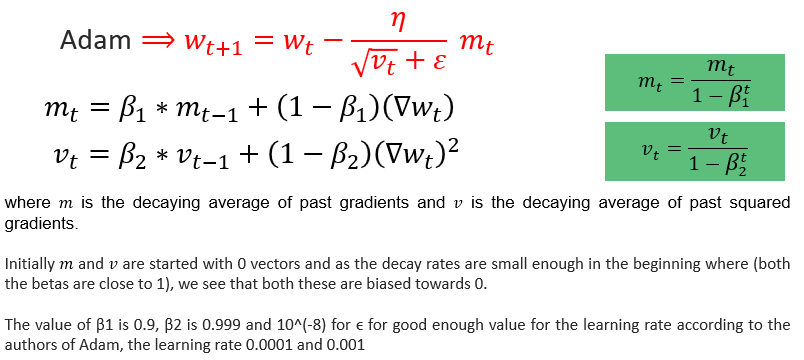

In [142]:
def adam(x,y,alph,epsi,b1,b2,max_iter):
    
    theta_0 = 0
    theta_1 = 0
    alpha = alph
    epsilon=epsi
    beta_1=b1
    beta_2=b2
    mt_0=0
    mt_1=0
    vt_0=0
    vt_1=0
    
    y_predict = theta_0 + theta_1 * x
    m=len(x)
    cost_func=(1/(2*m))*sum((y_predict-y)**2)
    
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    
    for i in range(max_iter):
        y_predict = theta_0 + theta_1 * x
        y_predict_list.append(y_predict)
        
        theta0_grd = (1/m) * np.sum(y_predict - y)
        theta1_grd = (1/m) * np.sum((y_predict - y) * x)
        
        mt_0=beta_1*mt_0+(1-beta_1)*theta0_grd
        mt_1=beta_1*mt_1+(1-beta_1)*theta1_grd
        vt_0=beta_2*vt_0+(1-beta_2)*theta0_grd**2
        vt_1=beta_2*vt_1+(1-beta_2)*theta1_grd**2
        mt_0=mt_0/(1-pow(beta_1,i+1)) 
        mt_1=mt_1/(1-pow(beta_1,i+1)) 
        vt_0=vt_0/(1-pow(beta_2,i+1)) 
        vt_1=vt_1/(1-pow(beta_2,i+1))
        
        theta_0 = theta_0 - (alpha/(np.sqrt(vt_0)+epsilon)) * mt_0
        theta0_list.append(theta_0)
        
        theta_1 = theta_1 - (alpha/(np.sqrt(vt_1)+epsilon)) * mt_1
        theta1_list.append(theta_1)
        
        cost_func=(1/(2*m))*sum((y_predict-y)**2)
        loss_list.append(cost_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1,y_predict

# alpha = 0.2 & b1 = 0.9 & b2 = 0.91 with Iterations = 1000

In [143]:
theta0_list,theta1_list,cost_list,y_pre_list,t0,t1,y_pre=adam(x,y,0.2,1e-8,0.9,0.91,1000)

In [144]:
y_predict = t0 + t1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_pre)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9997043911882368


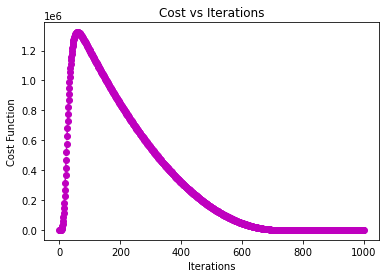

In [145]:
plt.plot(cost_list,'o-.m')
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost vs Iterations")
plt.show()

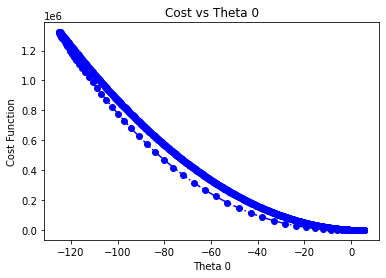

In [146]:
plt.plot(theta0_list,cost_list,'o-.b')
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost vs Theta 0")
plt.show()

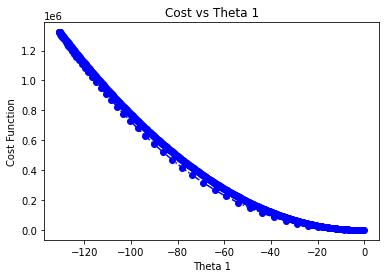

In [147]:
plt.plot(theta1_list,cost_list,'o-.b')
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost vs Theta 1")
plt.show()

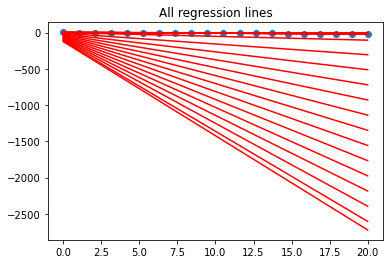

In [148]:
plt.scatter(x,y)
plt.plot(x,y_pre_list[0],color='red')
for i in range(1,len(y_pre_list),50):
    plt.plot(x,y_pre_list[i],color='red')
plt.title("All regression lines")
plt.show()

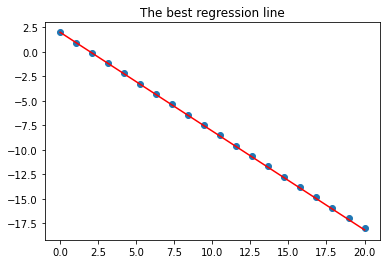

In [149]:
plt.scatter(x, y)
plt.plot(x, y_pre, color='r')
plt.title("The best regression line")
plt.show()

# alpha = 0.001 & b1 = 0.9 & b2 = 0.999 with Iterations = 100

In [150]:
theta0_list,theta1_list,cost_list,y_pre_list,t0,t1,y_pre=adam(x,y,0.001,1e-8,0.9,0.999,100)

In [151]:
y_predict = t0 + t1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_pre)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}") # so bad 

R2: -1.7284237480570628


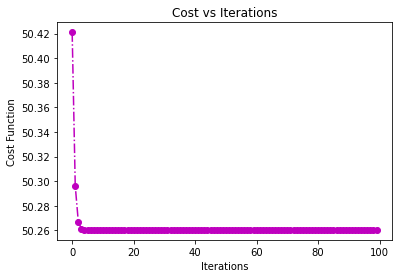

In [152]:
plt.plot(cost_list,'o-.m')
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost vs Iterations")
plt.show()

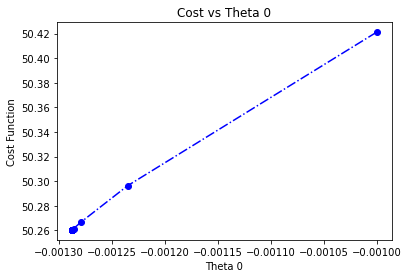

In [153]:
plt.plot(theta0_list,cost_list,'o-.b')
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost vs Theta 0")
plt.show()

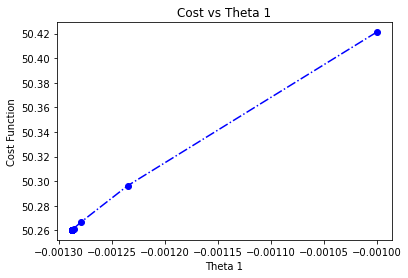

In [154]:
plt.plot(theta1_list,cost_list,'o-.b')
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost vs Theta 1")
plt.show()

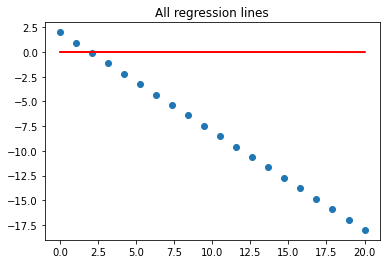

In [155]:
plt.scatter(x,y)
plt.plot(x,y_pre_list[0],color='red')
for i in range(1,len(y_pre_list),50):
    plt.plot(x,y_pre_list[i],color='red')
plt.title("All regression lines")
plt.show()

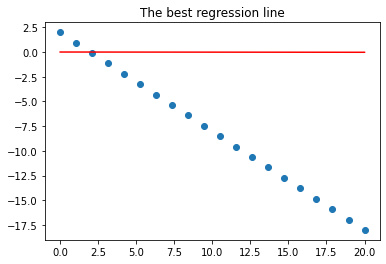

In [156]:
plt.scatter(x, y)
plt.plot(x, y_pre, color='r')
plt.title("The best regression line")
plt.show()